# Prepare dataset

In [30]:
import os
import pandas as pd
import seaborn as sns
CURR_DIR = "/mnt/d/community_class/insurance_premium"
os.chdir(CURR_DIR)


In [31]:
data_file_path="dataset/insurance.csv"

In [32]:
import pandas as pd
df = pd.read_csv(data_file_path)

In [33]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [34]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

No null value present in our dataset

/tmp/ipykernel_2331/3950901834.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.expenses,hist=False,bins=10)


<AxesSubplot: xlabel='expenses', ylabel='Density'>

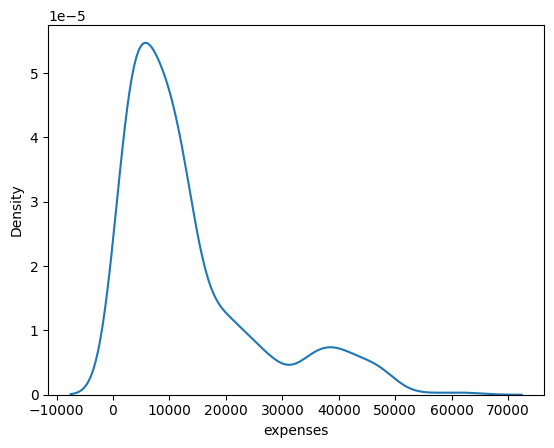

In [35]:
sns.distplot(df.expenses,hist=False,bins=10)

/tmp/ipykernel_2331/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

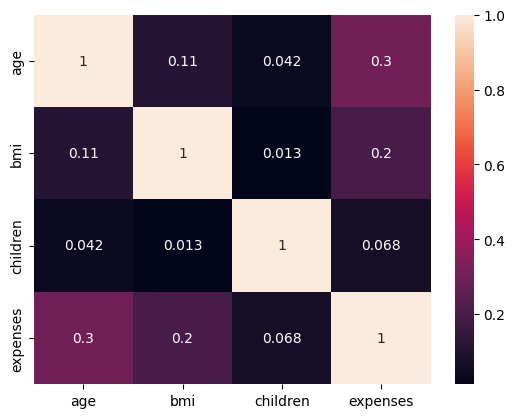

In [36]:
sns.heatmap(df.corr(),annot=True)

In [37]:
# Based on head map we can conclude that Linear Regression model will not perform good on this dataset

In [38]:
df.describe(include="all")

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


<AxesSubplot: xlabel='sex', ylabel='expenses'>

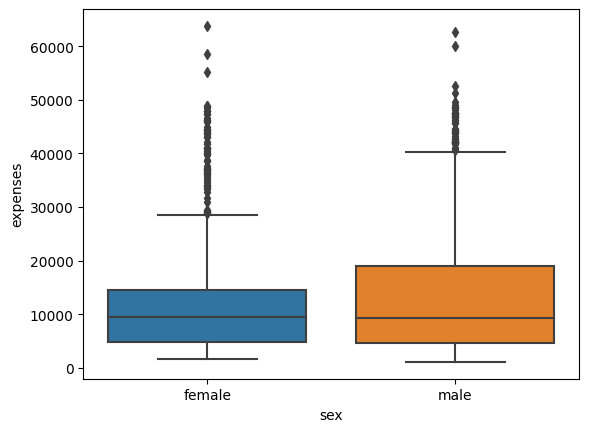

In [39]:
sns.boxplot(y=df.expenses,x=df.sex)

<AxesSubplot: xlabel='smoker', ylabel='expenses'>

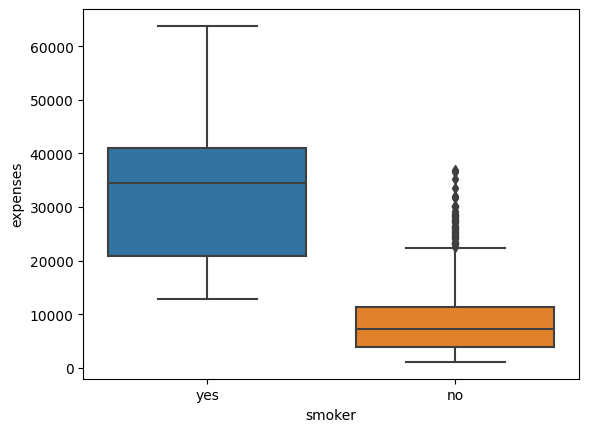

In [40]:
sns.boxplot(y=df.expenses,x=df.smoker)

In [41]:
#if person is smoker he/she need to pay more premium

<AxesSubplot: xlabel='region', ylabel='expenses'>

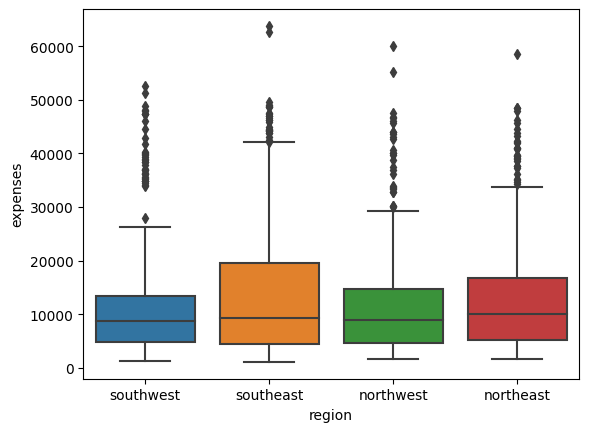

In [42]:
sns.boxplot(y=df.expenses,x=df.region)

<AxesSubplot: xlabel='children', ylabel='expenses'>

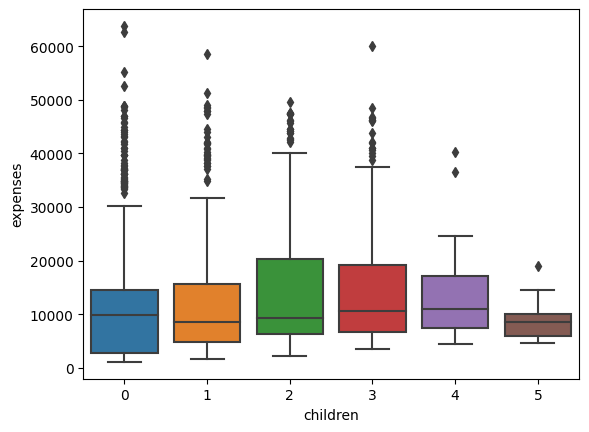

In [43]:
sns.boxplot(y=df.expenses,x=df.children)

<AxesSubplot: xlabel='age', ylabel='expenses'>

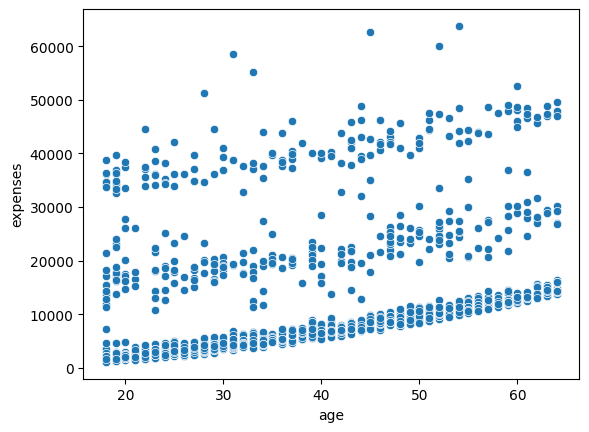

In [44]:
sns.scatterplot(x=df.age,y=df.expenses)

<AxesSubplot: xlabel='bmi', ylabel='expenses'>

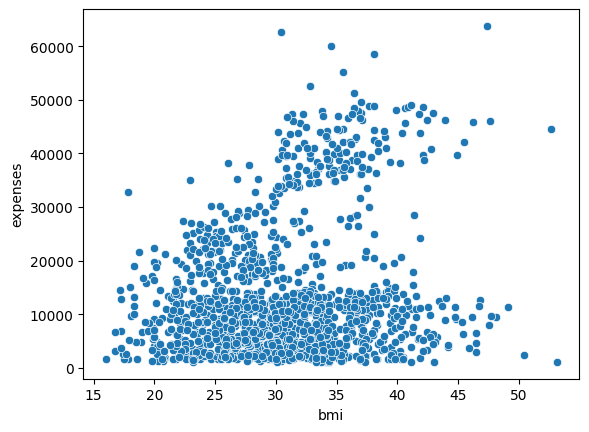

In [45]:
sns.scatterplot(x=df.bmi,y=df.expenses)

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,1.0,0.0,1.0,-1.438764,-0.453646,-0.908614
1,0.0,0.0,1.0,0.0,1.0,0.0,-1.509965,0.514186,-0.078767
2,0.0,0.0,1.0,0.0,1.0,0.0,-0.797954,0.382954,1.580926
3,0.0,1.0,0.0,0.0,1.0,0.0,-0.441948,-1.306650,-0.908614
4,0.0,1.0,0.0,0.0,1.0,0.0,-0.513149,-0.289606,-0.908614
...,...,...,...,...,...,...,...,...,...
1333,0.0,1.0,0.0,0.0,1.0,0.0,0.768473,0.054876,1.580926
1334,1.0,0.0,0.0,0.0,0.0,0.0,-1.509965,0.202511,-0.908614
1335,0.0,0.0,1.0,0.0,0.0,0.0,-1.509965,1.022707,-0.908614
1336,0.0,0.0,0.0,1.0,0.0,0.0,-1.296362,-0.798128,-0.908614


In [47]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder

In [ ]:
%%writefile src/components/preprocessor.py


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder

ORDINAL_COLUMNS = ['sex','smoker']
ONE_HOT_COLUMNS = ['region']
NUMERICAL_COLUMNS = ["age","bmi","children"]

numerical_pipleine = Pipeline(
    steps=[
        ("standard_scaler",StandardScaler())
    ]
)

one_hot_pipleine = Pipeline(
    steps=[
        ("one_hot",OneHotEncoder()),
       
    ]
)

ordinal_pipeline = Pipeline(
    steps=[
        ("one_hot",OrdinalEncoder()),
       
    ]
)
transformer = ColumnTransformer(transformers=[
    ('one_hot',one_hot_pipleine,one_hot_columns),
    ('ordinal',ordinal_pipeline,OR),
    ('numerical',numerical_pipleine,numerical_columns),
])


transformed_df = transformer.fit_transform(df)

In [112]:
from sklearn.model_selection import train_test_split